In [39]:
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
import warnings
from ycimpute.imputer import EM

In [40]:
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv("./src/stroke_prediction_raw.csv")

In [42]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,71.0,1,0,Yes,Rural,195.25,33.3,never smoked,0
1,Male,4.0,0,0,No,Urban,81.33,18.6,Unknown,0
2,Male,34.0,0,1,Yes,Urban,106.23,NaN,formerly smoked,0
3,Female,65.0,0,0,Yes,Rural,108.80,33.5,Unknown,0
4,Female,75.0,0,0,Yes,Rural,106.33,27.8,Unknown,0
...,...,...,...,...,...,...,...,...,...,...
5105,Female,54.0,0,0,Yes,Urban,75.52,28.7,formerly smoked,0
5106,Male,57.0,0,0,Yes,Rural,98.54,30.2,never smoked,0
5107,Female,50.0,0,0,Yes,Rural,103.81,28.3,never smoked,0
5108,Female,25.0,0,0,Yes,Rural,63.64,31.3,formerly smoked,0


### Variable Transformation

In [43]:
df['_gender'], df['gender'] = df['gender'], LabelEncoder().fit_transform(df['gender'])
df['_ever_married'], df['ever_married'] = df['ever_married'], LabelEncoder().fit_transform(df['ever_married'])
df['_smoking_status'], df['smoking_status'] = df['smoking_status'], LabelEncoder().fit_transform(df['smoking_status'])
df['_Residence_type'], df['Residence_type'] = df['Residence_type'], LabelEncoder().fit_transform(df['Residence_type'])

In [44]:
df.to_csv('after_label_encoder.csv', sep=',', index=False, encoding='utf-8')

### Missing Data

In [45]:
df = df.drop(['_gender', '_ever_married', '_smoking_status', '_Residence_type'], axis=1)

In [46]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [47]:
df[df.isnull().any(axis=1)]

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,34.00,0,1,1,1,106.23,NaN,1,0
8,1,59.00,0,0,1,0,211.78,NaN,1,1
11,1,25.00,0,0,1,0,78.29,NaN,3,0
27,1,32.00,1,0,0,0,74.43,NaN,0,0
74,1,54.00,0,0,1,0,74.06,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...
4856,0,71.00,1,0,1,1,105.55,NaN,3,0
4858,1,1.88,0,0,0,0,143.97,NaN,0,0
4950,1,45.00,0,1,1,0,93.77,NaN,0,0
4984,1,58.00,0,0,1,1,84.94,NaN,2,0


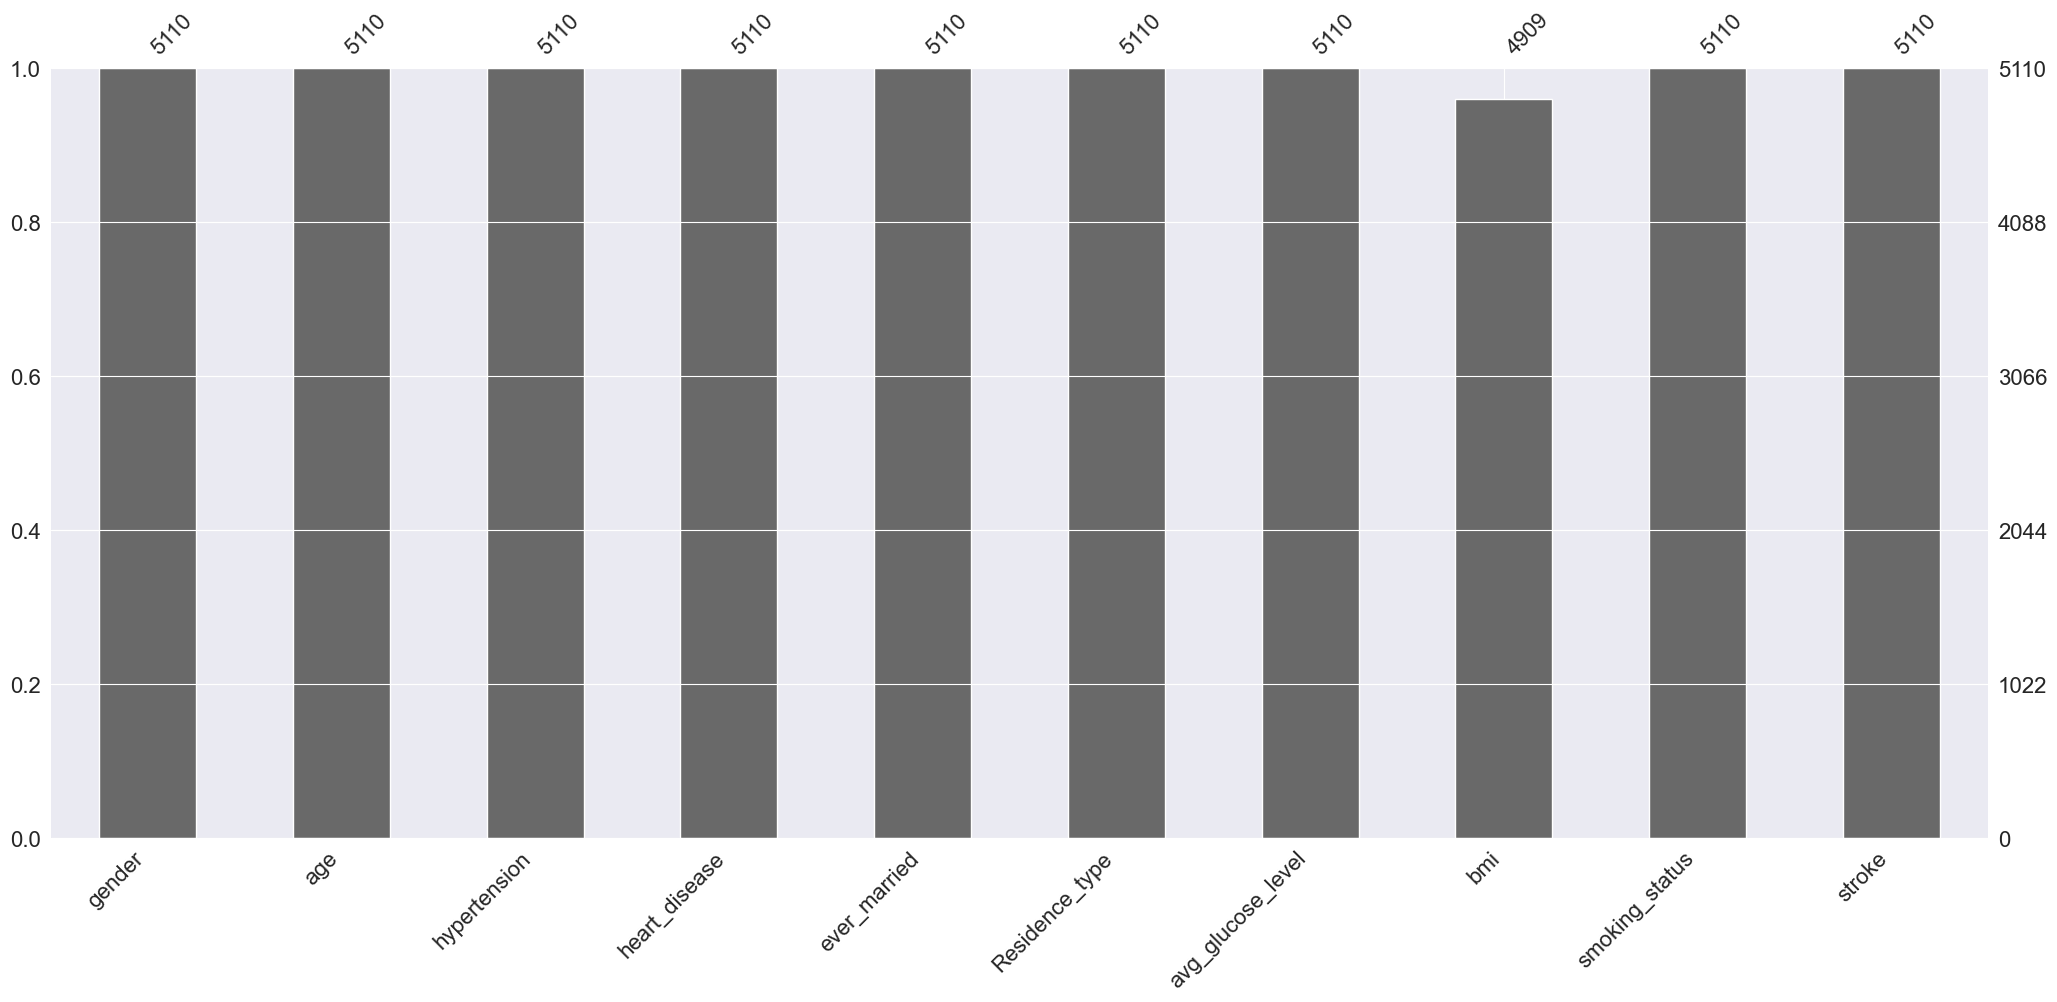

In [48]:
msno.bar(df);

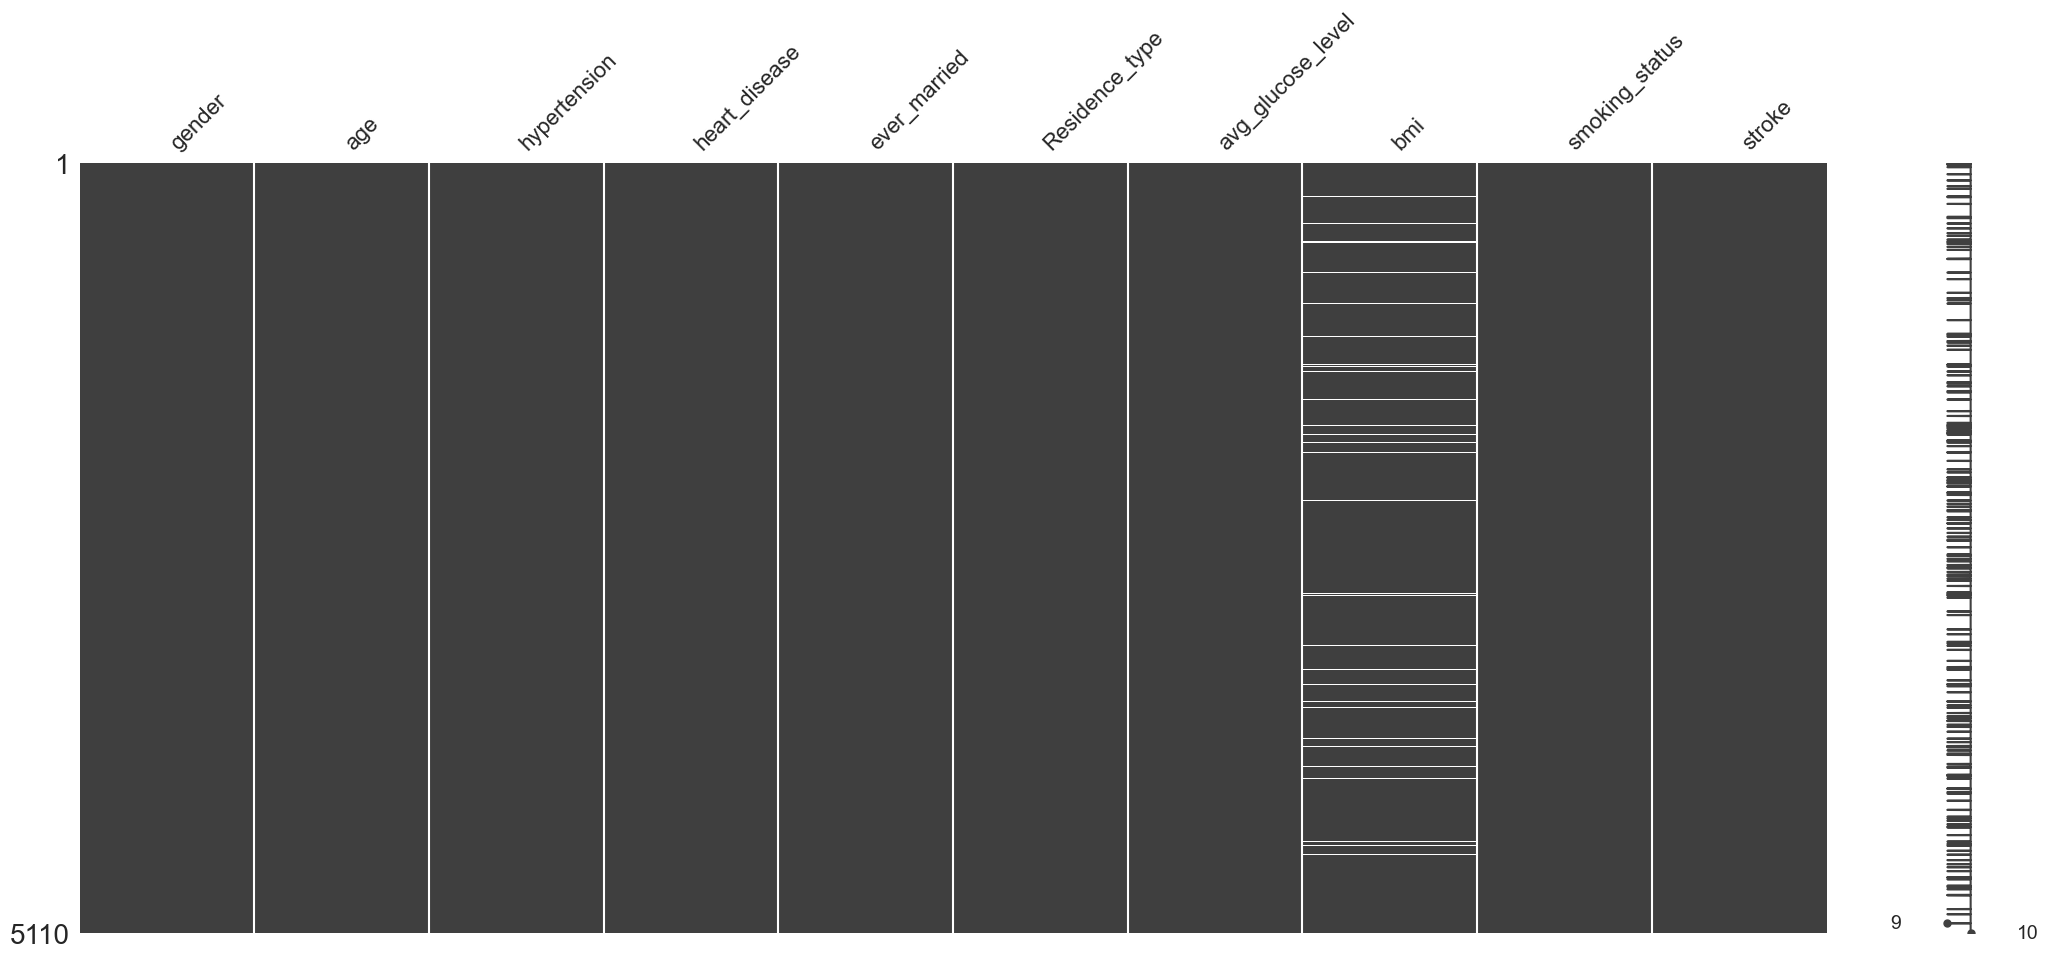

In [49]:
msno.matrix(df);

In [50]:
# df.dropna(how="all") # elemanlarının tamamı NaN olan satırı silmek için

In [51]:
# eksik verilerin algoritma yardımı ile doldurulma işlemi
var_column_names = list(df)
n_df = np.array(df)
dff = EM().complete(n_df)
df = pd.DataFrame(dff, columns=var_column_names)

In [52]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,71.0,1.0,0.0,1.0,0.0,195.25,33.3,2.0,0.0
1,1.0,4.0,0.0,0.0,0.0,1.0,81.33,18.6,0.0,0.0
2,1.0,34.0,0.0,1.0,1.0,1.0,106.23,0.0,1.0,0.0
3,0.0,65.0,0.0,0.0,1.0,0.0,108.80,33.5,0.0,0.0
4,0.0,75.0,0.0,0.0,1.0,0.0,106.33,27.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5105,0.0,54.0,0.0,0.0,1.0,1.0,75.52,28.7,1.0,0.0
5106,1.0,57.0,0.0,0.0,1.0,0.0,98.54,30.2,2.0,0.0
5107,0.0,50.0,0.0,0.0,1.0,0.0,103.81,28.3,2.0,0.0
5108,0.0,25.0,0.0,0.0,1.0,0.0,63.64,31.3,1.0,0.0


In [53]:
# deleted bkm == 0.0 rows
df = pd.DataFrame(df[~(df['bmi'] == 0.0)].to_records(index=False), index=df[~(df['bmi'] == 0.0)].index)

In [54]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [55]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,71.0,1.0,0.0,1.0,0.0,195.25,33.3,2.0,0.0
1,1.0,4.0,0.0,0.0,0.0,1.0,81.33,18.6,0.0,0.0
3,0.0,65.0,0.0,0.0,1.0,0.0,108.80,33.5,0.0,0.0
4,0.0,75.0,0.0,0.0,1.0,0.0,106.33,27.8,0.0,0.0
5,0.0,21.0,0.0,0.0,0.0,0.0,121.11,21.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5105,0.0,54.0,0.0,0.0,1.0,1.0,75.52,28.7,1.0,0.0
5106,1.0,57.0,0.0,0.0,1.0,0.0,98.54,30.2,2.0,0.0
5107,0.0,50.0,0.0,0.0,1.0,0.0,103.81,28.3,2.0,0.0
5108,0.0,25.0,0.0,0.0,1.0,0.0,63.64,31.3,1.0,0.0


### Outliers

In [56]:
clf = LocalOutlierFactor(n_neighbors=10, contamination='auto')
clf.fit_predict(df)

array([1, 1, 1, ..., 1, 1, 1])

In [57]:
df_scores = clf.negative_outlier_factor_
df_scores

array([-0.98824838, -0.98039673, -1.07424506, ..., -0.98175043,
       -1.13893565, -1.02376906])

In [58]:
np.sort(df_scores[:])

array([-3.00589394, -2.64824885, -2.42447232, ..., -0.94284021,
       -0.9398665 , -0.93305202])

In [59]:
tolerance = np.sort(df_scores[:])[10]

In [60]:
outlier_boolean = df_scores < tolerance
not_outlier_boolean = df_scores > tolerance

In [61]:
df[outlier_boolean]

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
313,0.0,79.0,0.0,0.0,1.0,1.0,79.03,11.3,0.0,0.0
746,1.0,40.0,0.0,0.0,1.0,0.0,60.96,11.5,2.0,0.0
810,0.0,23.0,1.0,0.0,0.0,1.0,70.03,78.0,3.0,0.0
2762,0.0,18.0,0.0,0.0,0.0,0.0,168.15,48.5,2.0,0.0
2846,1.0,0.8,0.0,0.0,0.0,1.0,75.22,33.1,0.0,0.0
4453,0.0,61.0,1.0,0.0,1.0,0.0,170.05,60.2,3.0,0.0
4547,0.0,56.0,0.0,0.0,1.0,0.0,112.43,54.6,2.0,0.0
4703,0.0,2.0,0.0,0.0,0.0,0.0,79.89,31.6,0.0,0.0
4922,1.0,17.0,1.0,0.0,0.0,0.0,61.67,97.6,0.0,0.0
4962,1.0,38.0,1.0,0.0,1.0,0.0,56.90,92.0,2.0,0.0


In [62]:
df = df[not_outlier_boolean]

### Standartizaston

In [63]:
#var_column_names = list(df)

In [64]:
#df = pd.DataFrame(preprocessing.scale(np.array(df)), columns=var_column_names)

In [65]:
#df

In [66]:
preprocessing.scale(np.array(df))

array([[-0.83320143,  1.24691152,  3.15554978, ...,  0.58204254,
         0.58551728, -0.21112177],
       [ 1.19816771, -1.72485862, -0.31690199, ..., -1.33597828,
        -1.28890339, -0.21112177],
       [-0.83320143,  0.98078285, -0.31690199, ...,  0.60813806,
        -1.28890339, -0.21112177],
       ...,
       [-0.83320143,  0.31546118, -0.31690199, ..., -0.07034549,
         0.58551728, -0.21112177],
       [-0.83320143, -0.79340828, -0.31690199, ...,  0.32108733,
        -0.35169306, -0.21112177],
       [ 1.19816771, -0.17244138, -0.31690199, ...,  0.06013212,
         1.52272761, -0.21112177]])

### Save

In [67]:
df.to_csv('processed_stroke_prediction.csv', sep=',', index=False, encoding='utf-8')